# Supermarket Analysis
Data [from Kaggle.](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales?select=supermarket_sales+-+Sheet1.csv)

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

## Data Prep

In [2]:

df_super = pd.read_csv('data/supermarket_sales - Sheet1.csv')
df_super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [5]:
df_super['Date'] = pd.to_datetime(df_super['Date'], format='%m/%d/%Y')

## Customer Type Exploration

A very useless plot, that helps me remembering that you can plot ugly things directly from a Pandas Series or DataFrame.

<Axes: xlabel='Customer type'>

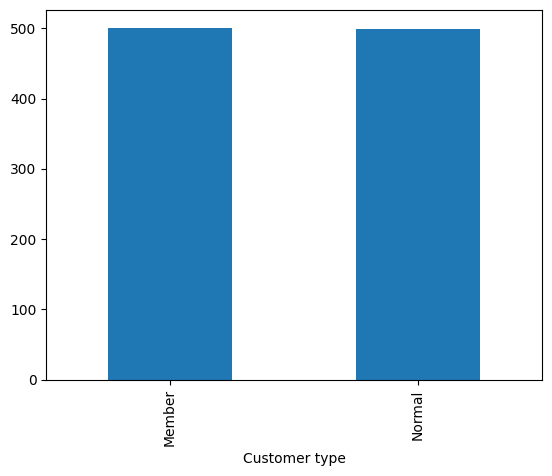

In [8]:
df_super['Customer type'].value_counts().plot(kind='bar')
plt.xlabel('Customer Type')
plt.ylabel('Count')

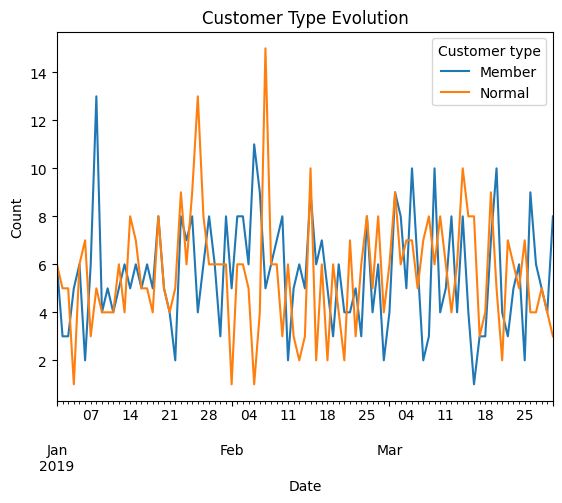

In [24]:
df_customer_type_grouped = (
    df_super
    .groupby(['Date', 'Customer type'])
    .size()
    .reset_index(name='Count')
)

df_customer_type_pivot = (
    df_customer_type_grouped
    .pivot(
        index='Date', 
        columns='Customer type', 
        values='Count'
    )
)

df_customer_type_pivot.fillna(0, inplace=True)

ax = df_customer_type_pivot.plot(title='Customer Type Evolution')

# Etiquetas y título
ax.set_xlabel('Date')
ax.set_ylabel('Count')

# Mostrar el gráfico
plt.show()